## 1. Data Cleaning and Preparation

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [11]:
data=pd.read_csv(r"C:\Users\karen\Downloads\Cardiotocographic.csv")
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [13]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [ ]:
empty_cols=['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
#filling null values with mean of the column
for col in empty_cols:
    mean=data[col].mean()
    data[col].fillna(mean,inplace=True)

In [20]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [21]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [22]:
num_cols=data.select_dtypes(include=['int64','float64']).columns

In [23]:
num_cols

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [43]:
#finding outliers usning IQR method and treating them
for col in num_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
#values greater than upper limit and lower than lower limit are outliers
    outliers=data[(data[col]<lower_limit) | (data[col]>upper_limit)]
    if  len(outliers):
        print(f'Outliers detected in column {col}:')
        print(outliers[[col]])

Outliers detected in column LB:
              LB
83    158.000000
84    158.000000
85    158.000000
86    158.000000
87    159.000000
88     52.000000
89    159.000000
90    159.000000
285   158.000000
286   158.000000
287   158.000000
288   158.000000
350   214.000000
448    52.000000
648    51.842487
722   214.000000
984   214.000000
1059  214.000000
1273  160.000000
1326   52.188547
Outliers detected in column AC:
            AC
53    0.014706
54    0.012712
55    0.014230
106  -0.019284
129   0.017241
...        ...
1354  0.014842
1384  0.012579
1393  0.038567
1427  0.012035
1490  0.038567

[78 rows x 1 columns]
Outliers detected in column FM:
            FM
4     0.072335
5     0.222390
6     0.407840
7     0.380223
8     0.441400
...        ...
1512  0.006272
1526  0.008653
1527  0.009840
1528  0.009357
1529  0.006031

[262 rows x 1 columns]
Outliers detected in column UC:
            UC
88    0.029851
179   0.012987
299   0.029851
455  -0.014925
551   0.029851
782   0.014925
979

In [40]:
#considering values lesser then upper limit and greater than lower limit as non outliers
data=data[(data[col]>=lower_limit) & (data[col]<=upper_limit)]


In [41]:
data

,level_0,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,0,132.000000,0.006380,0.000000,0.006380,0.003190,0.000003,0.000175,17.0,2.1,0.000000,10.4,130.0,0.316371,1.0
1,1,1,133.000000,0.003322,0.000000,0.008306,0.003322,0.000003,0.000175,16.0,2.1,0.000000,13.4,130.0,0.316371,1.0
2,2,2,134.000000,0.002561,0.000000,0.007742,0.002561,0.000003,0.000175,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
3,3,3,131.948232,0.006515,0.000000,0.008143,0.000000,0.000003,0.000175,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
4,4,4,131.000000,0.005076,0.072335,0.007614,0.002538,0.000003,0.000175,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1541,1541,140.000000,0.003219,0.000000,0.007812,0.000000,0.000003,0.000175,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
1542,1542,1542,140.000000,0.003219,0.000000,0.006470,0.000898,0.000003,0.000175,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
1543,1543,1543,140.000000,0.003219,0.000000,0.006764,0.001127,0.000003,0.000175,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
1544,1544,1544,140.000000,0.003219,0.000000,0.004975,0.001244,0.000003,0.000175,77.0,0.7,17.000000,6.0,31.0,0.316371,1.0


## 2. Statistical Summary

In [49]:
stat_summary=data.describe()
print("Summary of all Columns:")
print(stat_summary)

Summary of all Columns:
                LB           AC           FM           UC           DL  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean    131.919815     0.004969     0.007579     0.004829     0.001920   
std      11.115063     0.003746     0.054729     0.003313     0.003111   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     125.000000     0.003219     0.000000     0.002788     0.000000   
50%     132.000000     0.003219     0.000000     0.004881     0.000000   
75%     138.000000     0.006672     0.001987     0.006816     0.003534   
max     214.000000     0.038567     0.961268     0.030002     0.030621   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.546000e+03  1546.000000  1546.000000  1546.000000  1546.000000   
mean  -5.379128e-07     0.000235    42.207271     1.461245     5.455809   
std    1.111870e-04     0.000667    17.422340     1.116480    15.659211   
min   -1.

## 3.Data Visualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

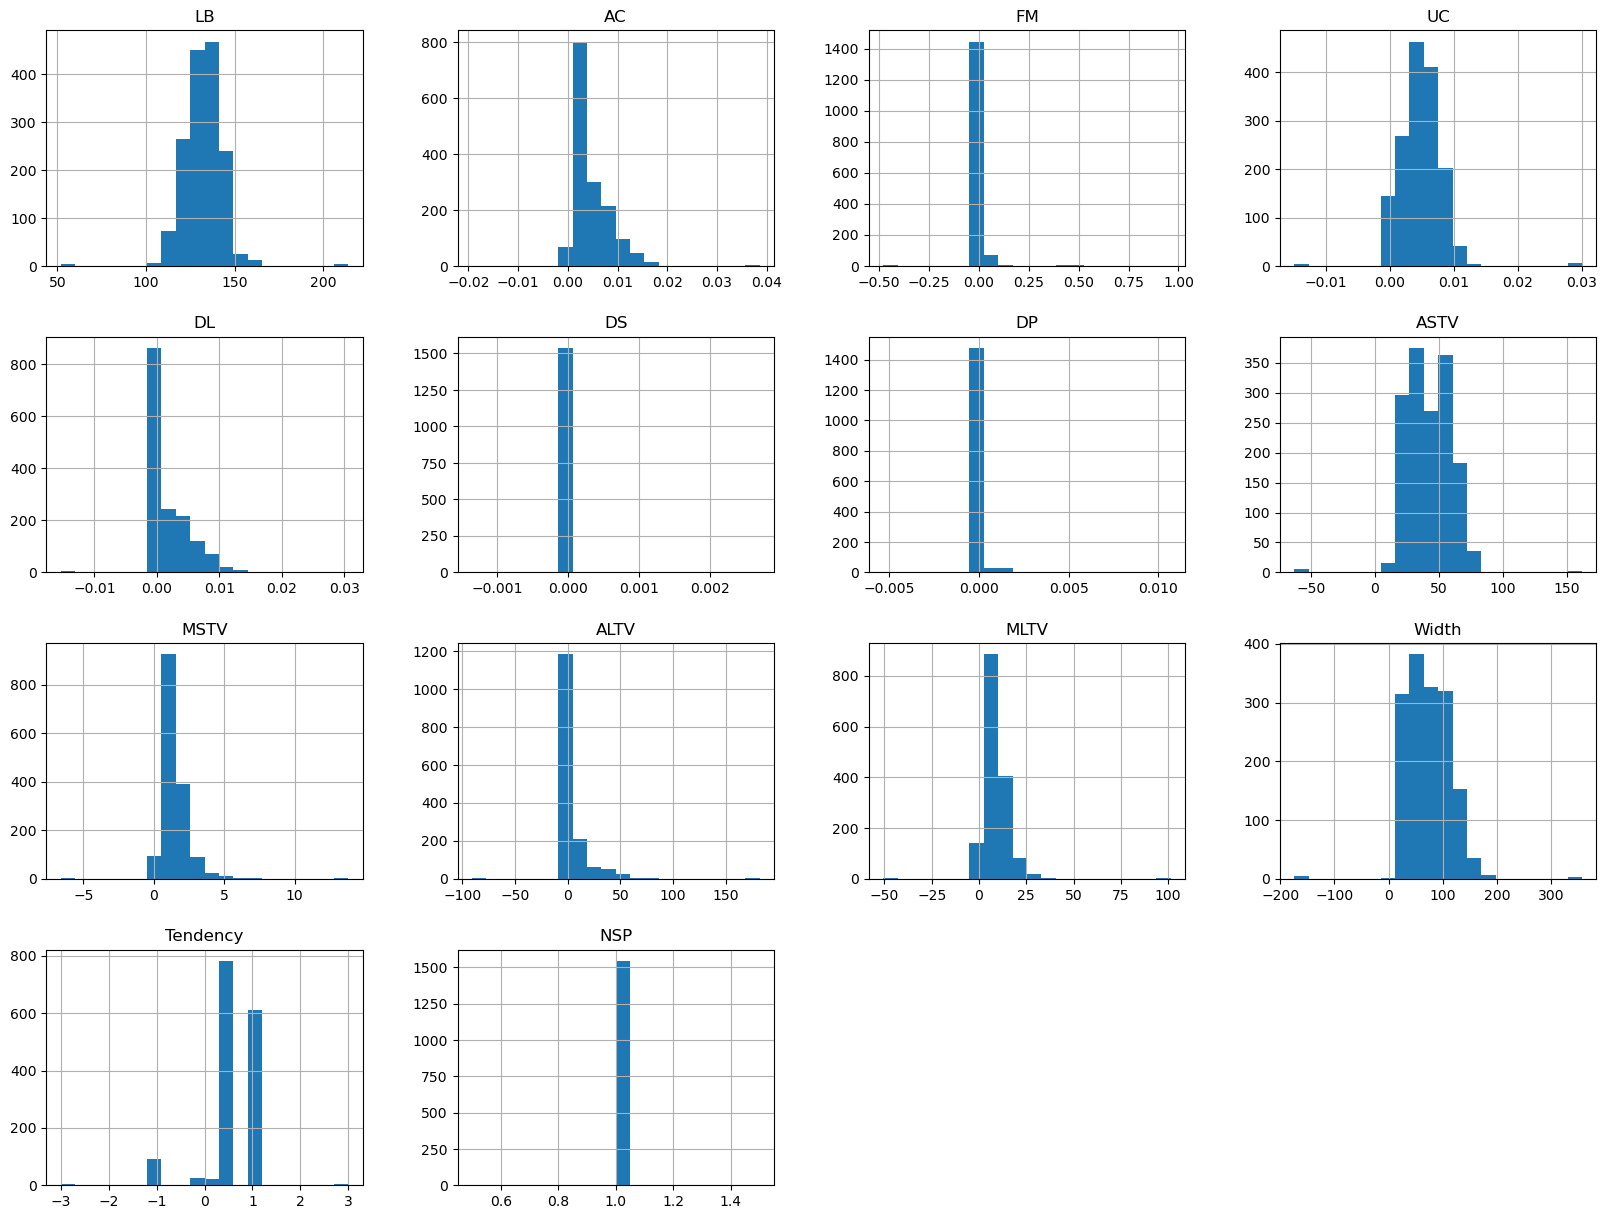

In [59]:
data.hist(bins=20,figsize=(20,15))
plt.show()

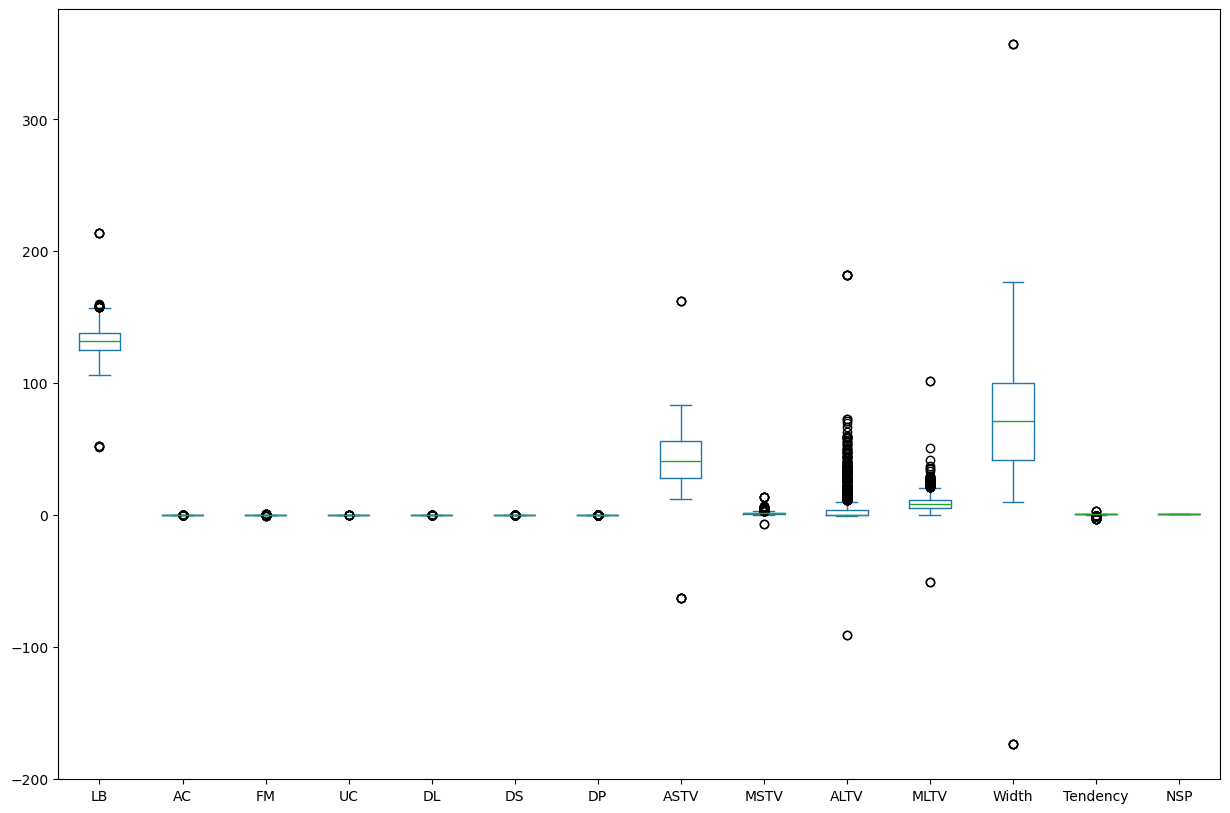

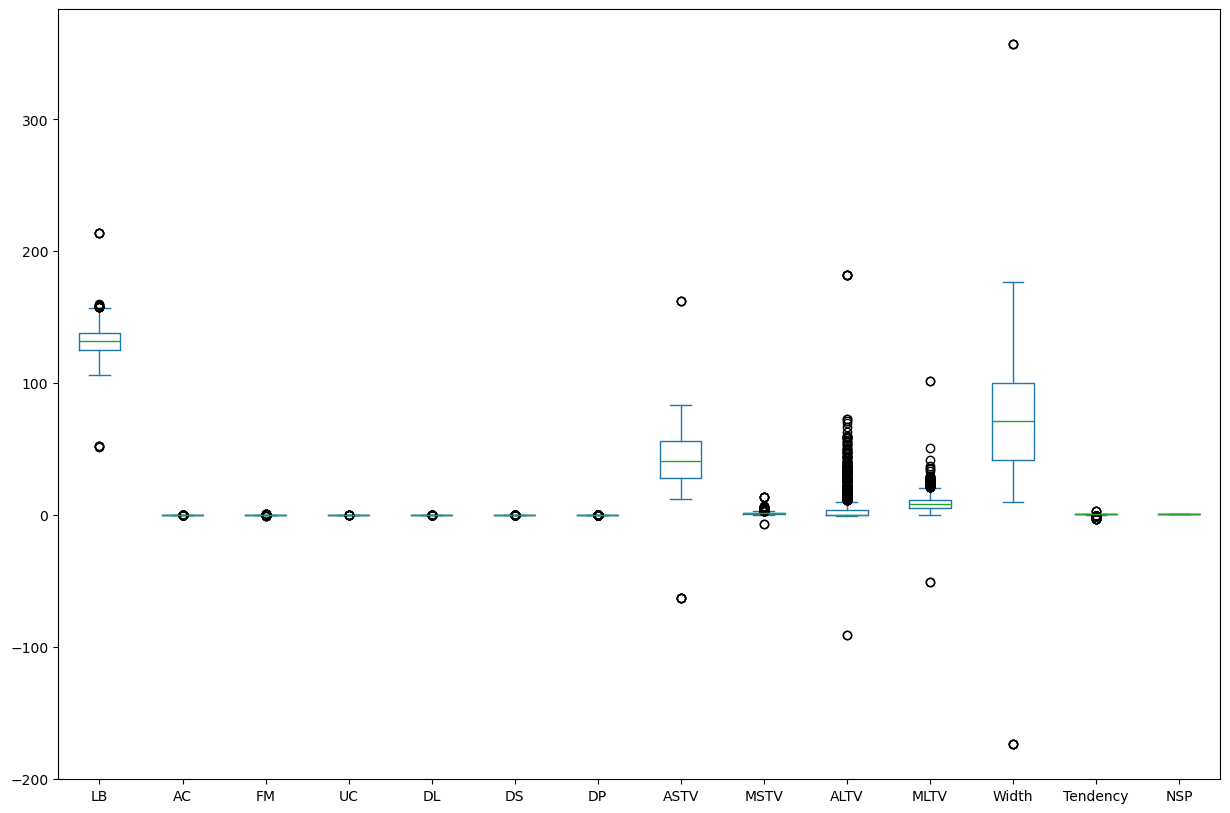

In [61]:
data.plot(kind='box',figsize=(15,10))
plt.show()

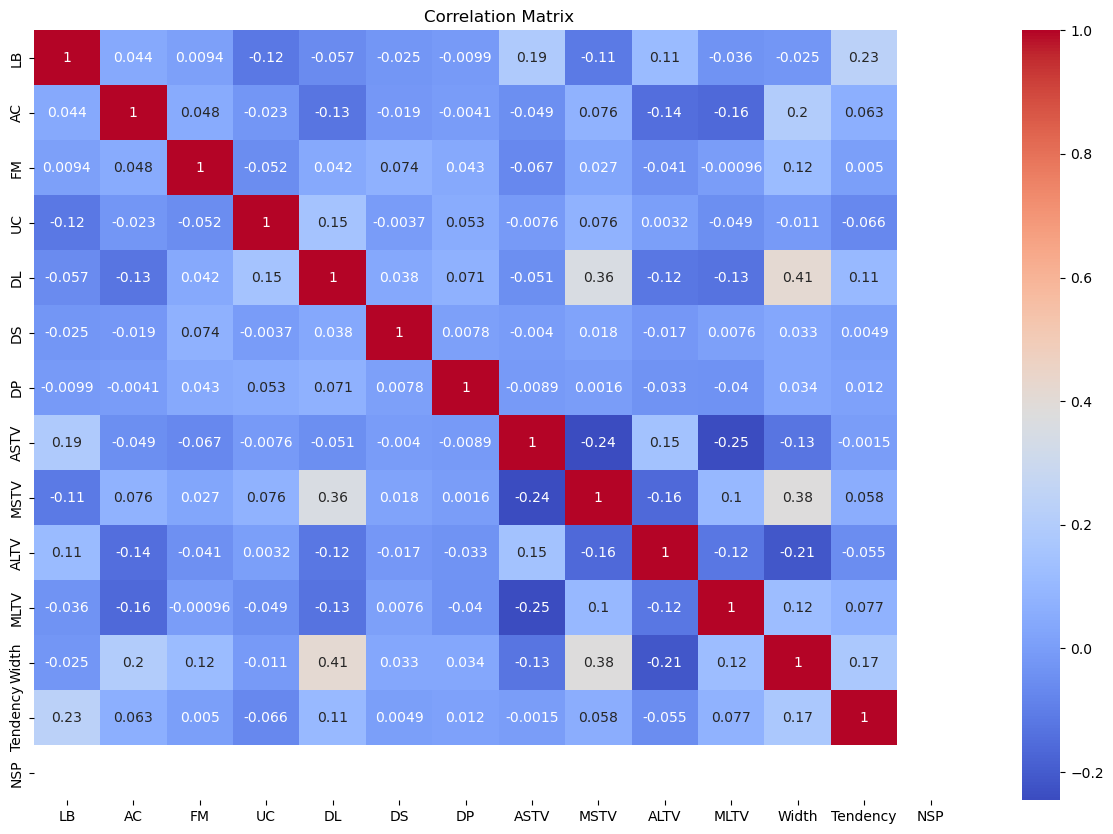

In [65]:
plt.figure(figsize=(15,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4.Pattern Recognition and Insights

In [67]:
strong_correlation=correlation_matrix[(correlation_matrix>0.5) & (correlation_matrix<1)]

In [68]:
print('Strong correlations')
strong_correlation

Strong correlations


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Conclusion

In [69]:
print("Conclusion:")
print("In this EDA process on the given dataset, the null values are replaces with the mean values and outliers are detected using IQR method and deleted.")
print("By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1.")
print("Heatmap is used to visualize the relation between the variables.")

Conclusion:
In this EDA process on the given dataset, the null values are replaces with the mean values and outliers are detected using IQR method and deleted.
By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1.
Heatmap is used to visualize the relation between the variables.


In [70]:
print("Key Insights:")
print("There is no much correlation between the variables in the dataset.")
print("This finding will help in decision making and model development.")

Key Insights:
There is no much correlation between the variables in the dataset.
This finding will help in decision making and model development.
